In [15]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

In [16]:
end=dt.datetime.now()
start=end-dt.timedelta(days=900)

In [17]:
index=['^NSEI']
data=pdr.get_data_yahoo(index,start,end)

[*********************100%***********************]  1 of 1 completed


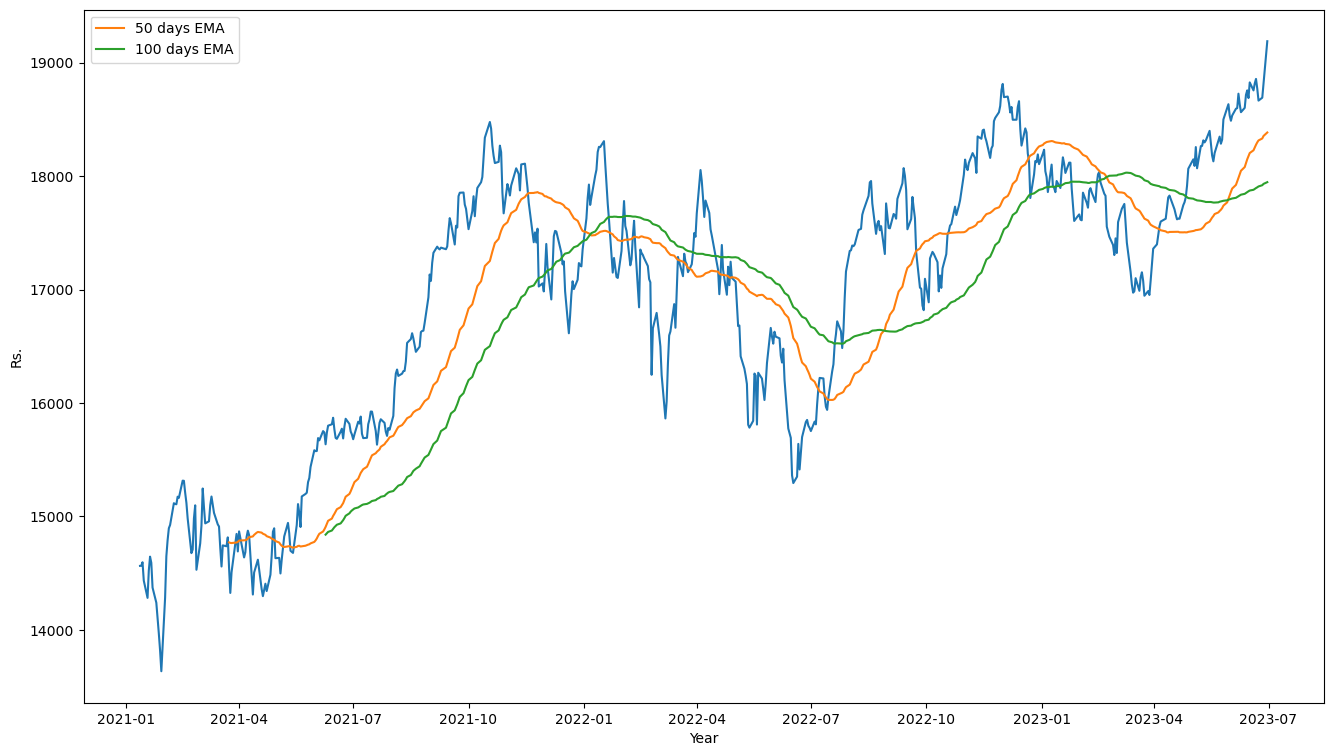

In [18]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(data['Close'])
EMA_FIFTY=data['Close'].rolling(window=50).mean()
EMA_HUNDRED=data['Close'].rolling(window=100).mean()

ax.plot(EMA_FIFTY,label='50 days EMA')
ax.plot(EMA_HUNDRED,label='100 days EMA')
ax.set_ylabel('Rs.')
ax.set_xlabel('Year')
ax.legend(loc='best')


[*********************100%***********************]  1 of 1 completed


Start date,2021-01-12
End date,2023-06-30
Total months,29
,Backtest
Annual return,11.558%
Cumulative returns,30.311%
Annual volatility,24.85%
Sharpe ratio,0.56
Calmar ratio,0.53
Stability,0.40
Max drawdown,-21.937%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.94,2022-04-28,2023-03-20,NaT,NaN
1,18.17,2021-10-19,2022-03-08,2022-04-21,133
2,13.67,2021-03-03,2021-04-20,2021-06-03,67
3,12.26,2021-01-21,2021-01-29,2021-02-25,26
4,9.54,2021-06-15,2021-07-30,2021-08-30,55


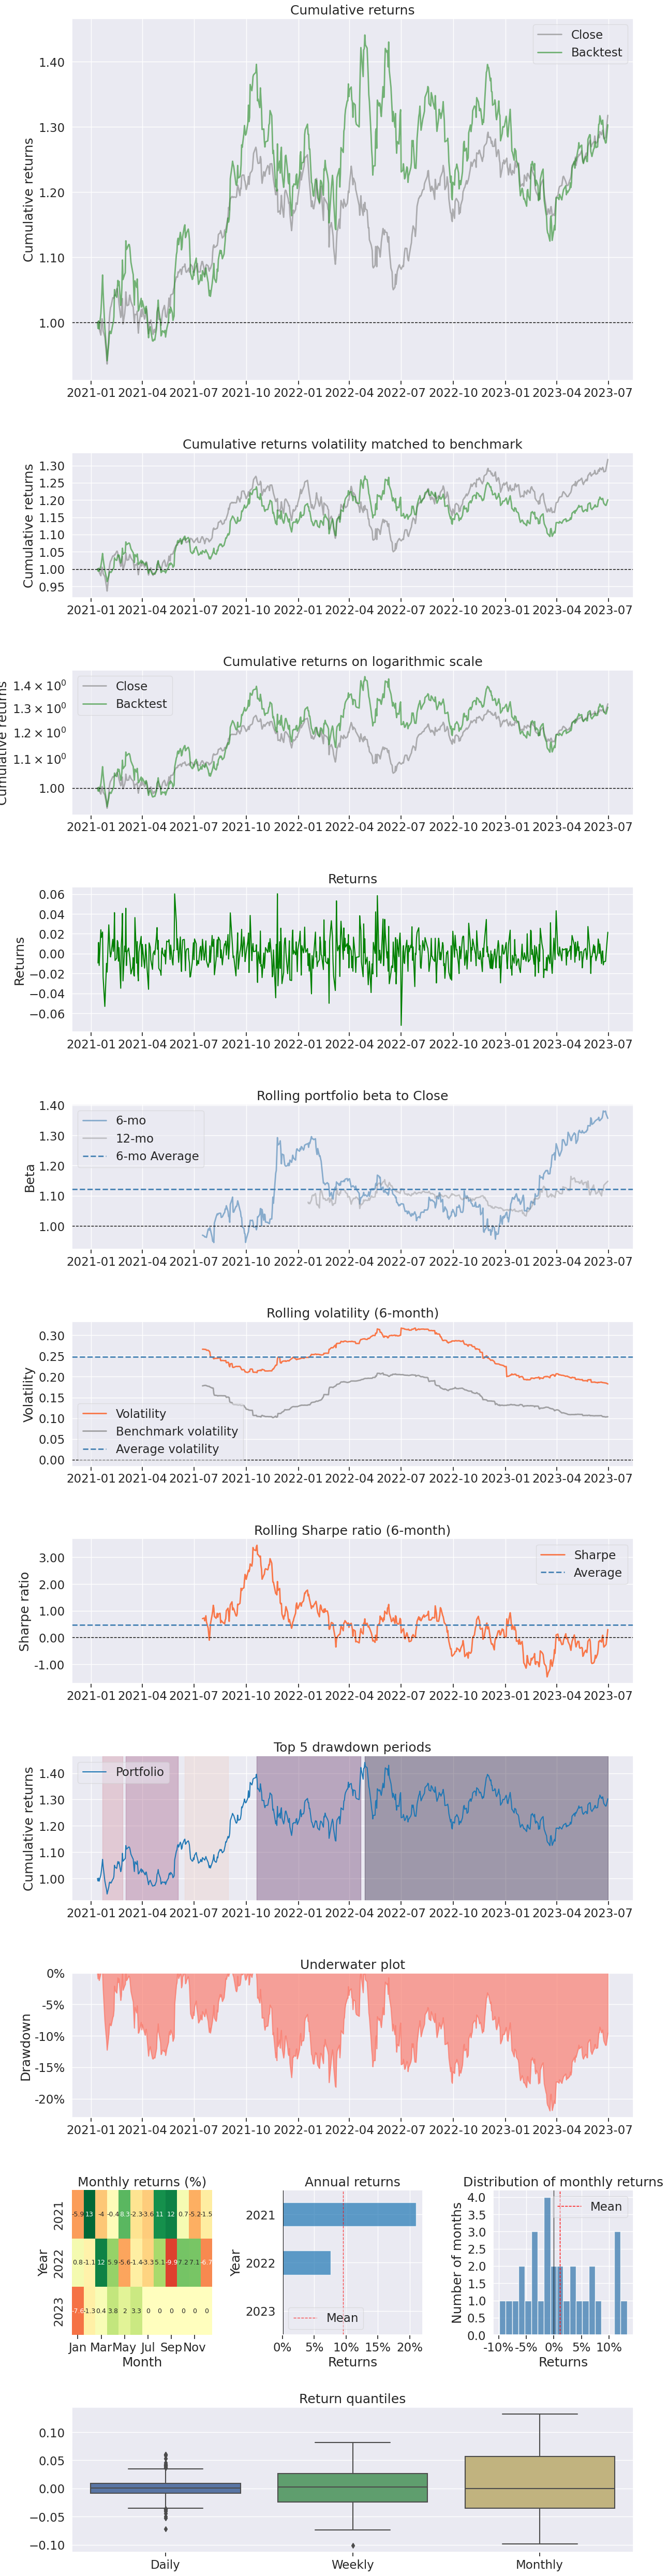

In [19]:
rel=pdr.get_data_yahoo('RELIANCE.NS',start,end)
benchmark=data.Close.pct_change()
rel_returns=rel.Close.pct_change()
fig=pf.create_returns_tear_sheet(rel_returns,benchmark_rets=benchmark,return_fig=True)